# Determine Period

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# 1. Load Datasets

In [5]:
def transform_date(date):

    try:

        new_date = date.year + (date.month - 1)/12 + date.day/365

        return new_date
    
    except:

        return float('nan')

In [6]:
def transform_value(value):

    try:

        return float(value)
    
    except:

        return float('nan')

In [7]:
df_1 = pd.read_csv('AirPassengers.csv')
df_2 = pd.read_csv('daily-total-female-births-CA.csv')
df_3 = pd.read_csv('Temp.csv', skiprows = [3652])

df_1 = df_1.rename(columns = {'Month': 'Time', '#Passengers': 'X_t'})
df_2 = df_2.rename(columns = {'date': 'Time', 'births': 'X_t'})
df_3 = df_3.rename(columns = {'Date': 'Time', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'X_t'})

df_1['Time'] = pd.to_datetime(df_1['Time'])
df_2['Time'] = pd.to_datetime(df_2['Time'])
df_3['Time'] = pd.to_datetime(df_3['Time'])

df_1['Time'] = df_1['Time'].map(lambda x: transform_date(x))
df_2['Time'] = df_2['Time'].map(lambda x: transform_date(x))
df_3['Time'] = df_3['Time'].map(lambda x: transform_date(x))

df_1['X_t'] = df_1['X_t'].map(lambda x: transform_value(x))
df_2['X_t'] = df_2['X_t'].map(lambda x: transform_value(x))
df_3['X_t'] = df_3['X_t'].map(lambda x: transform_value(x))

df_1 = df_1.dropna()
df_2 = df_2.dropna()
df_3 = df_3.dropna()

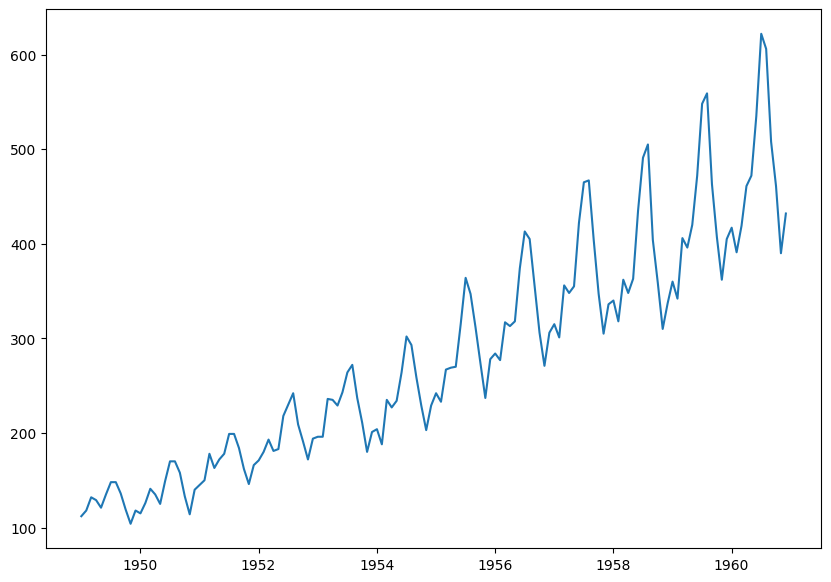

In [8]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['X_t'])
plt.show()

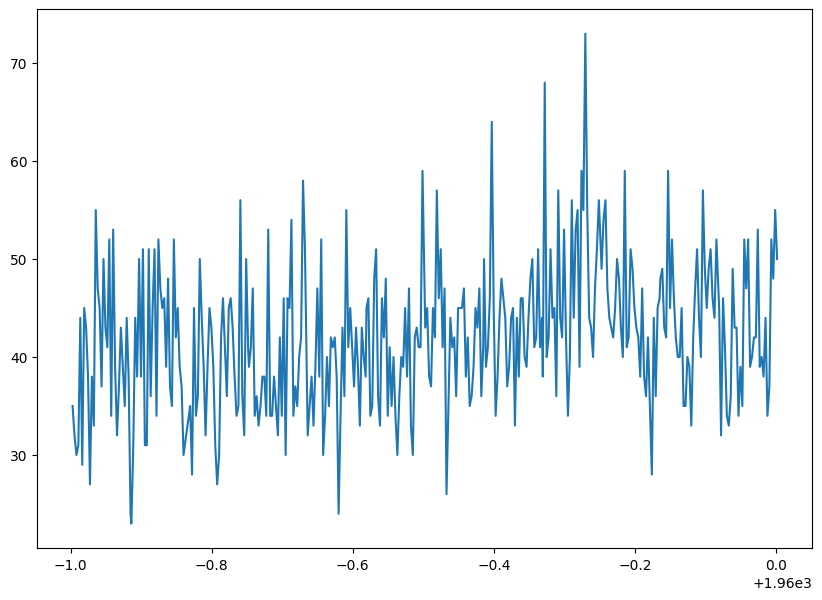

In [9]:
plt.figure(figsize = (10, 7))
plt.plot(df_2['Time'], df_2['X_t'])
plt.show()

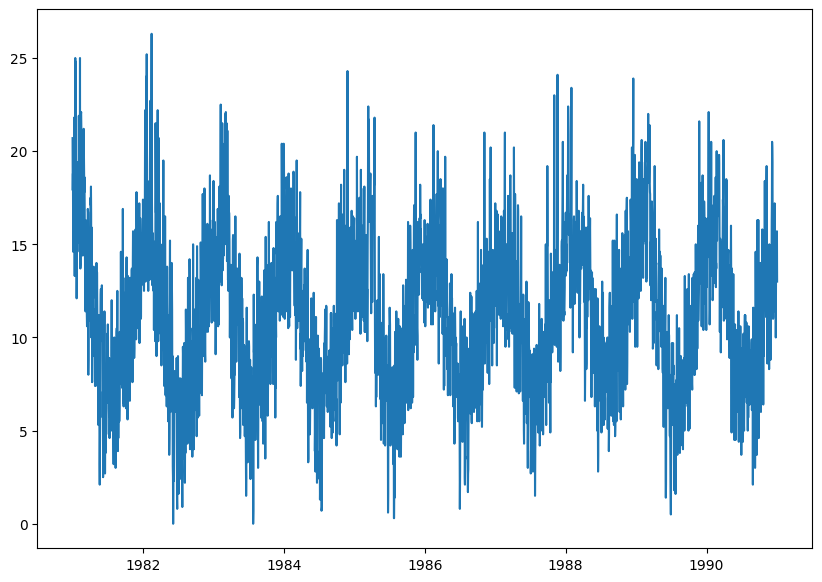

In [10]:
plt.figure(figsize = (10, 7))
plt.plot(df_3['Time'], df_3['X_t'])
plt.show()

# 2. Create datasets

In [11]:
df_4 = pd.DataFrame()

X_t_4 = []
Time_4 = []

T = 4

for t in range(400):

    arg_t = (t/10)

    arg_x = (2*math.pi*arg_t)/T

    X_t_4.append(math.sin(arg_x))
    Time_4.append(arg_t)

X_t_4 = pd.Series(X_t_4)
Time_4 = pd.Series(Time_4)

df_4['Time'] = Time_4
df_4['X_t'] = X_t_4

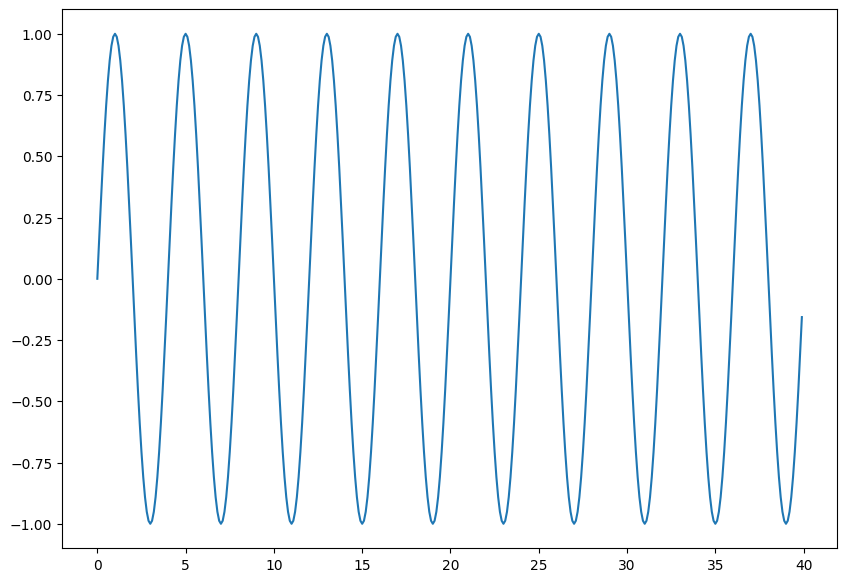

In [12]:
plt.figure(figsize = (10, 7))
plt.plot(df_4['Time'], df_4['X_t'])
plt.show()

# 3. Periodogram

A periodogram is a tool that estimates the spectral density of a signal in the frequency domain. Simply put, it shows the power of each frequency in a signal. In general, periodic signals have peaks in their power spectra that appear at the fundamental frequency of the signal and its harmonics.

In [13]:
from scipy import signal

### a. Airpassengers

In [14]:
f_1, Pxx_1 = signal.periodogram(df_1['X_t'])

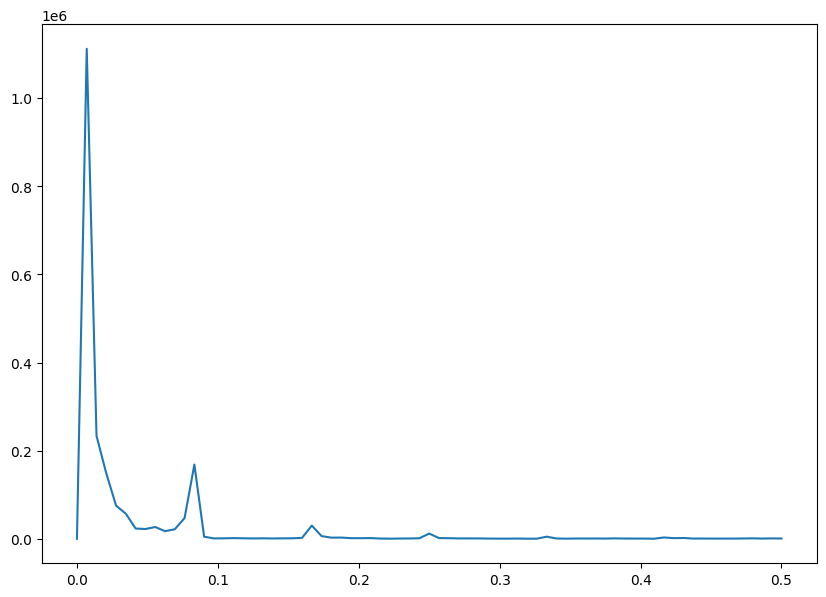

In [15]:
plt.figure(figsize = (10, 7))
plt.plot(f_1, Pxx_1)
plt.show()

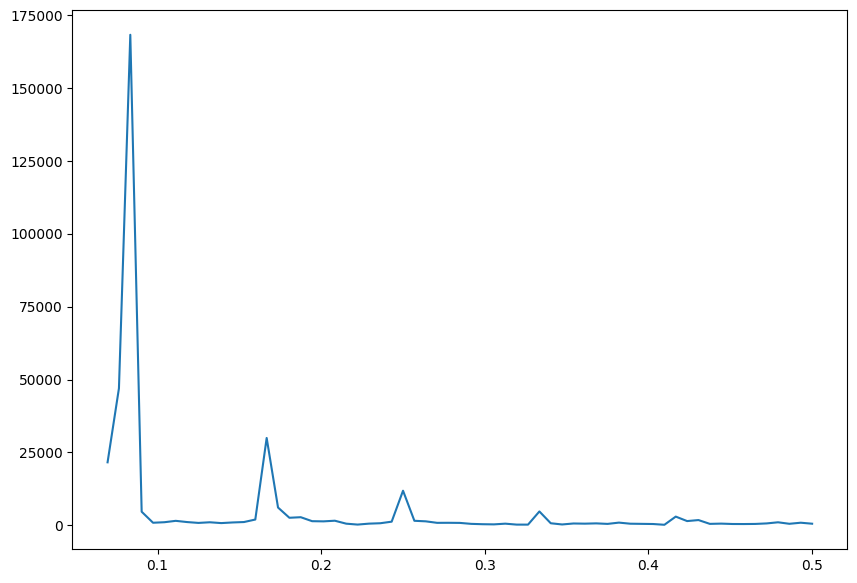

In [16]:
plt.figure(figsize = (10, 7))
plt.plot(f_1[10:], Pxx_1[10:])
plt.show()

In [17]:
f_1 = f_1[10:]
Pxx_1 = Pxx_1[10:]

In [18]:
T_1_N = 1/f_1[Pxx_1.argmax()]

In [19]:
T_1_N

12.0

In [20]:
T_1 = (df_1['Time'].iloc[1] - df_1['Time'].iloc[0])*T_1_N

In [21]:
T_1

0.9999999999990905

### b. Female Births

In [22]:
f_2, Pxx_2 = signal.periodogram(df_2['X_t'])

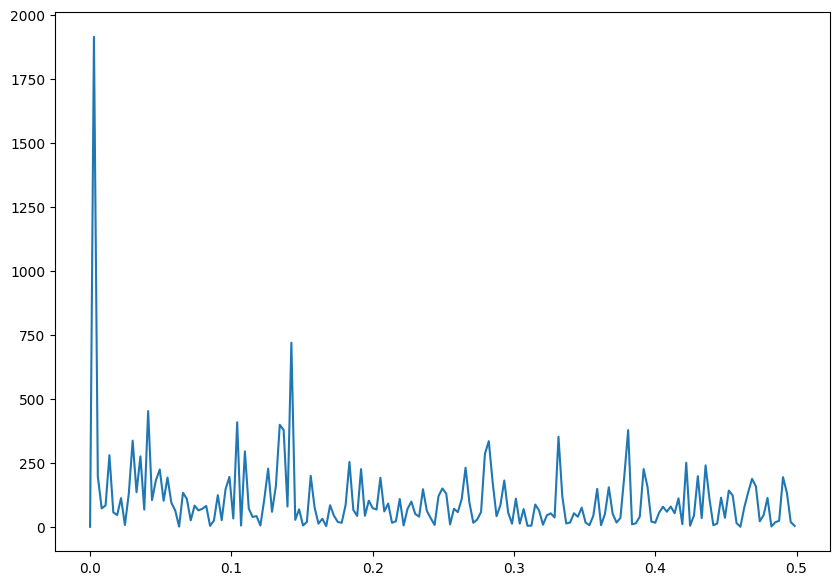

In [23]:
plt.figure(figsize = (10, 7))
plt.plot(f_2, Pxx_2)
plt.show()

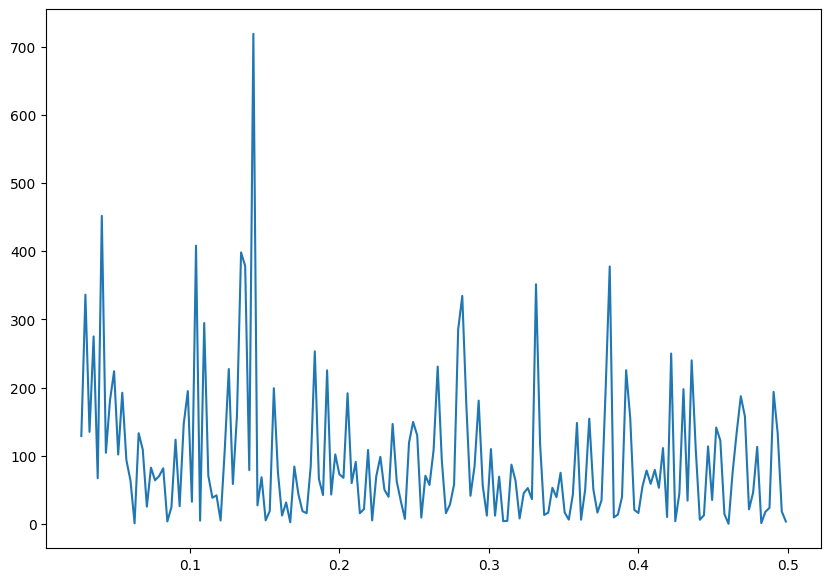

In [24]:
plt.figure(figsize = (10, 7))
plt.plot(f_2[10:], Pxx_2[10:])
plt.show()

In [25]:
f_2 = f_2[10:]
Pxx_2 = Pxx_2[10:]

In [26]:
T_2_N = 1/f_2[Pxx_2.argmax()]

In [27]:
T_2_N

7.019230769230769

In [28]:
T_2 = (df_2['Time'].iloc[1] - df_2['Time'].iloc[0])*T_2_N

In [29]:
T_2

0.019230769230489386

### c. Temperatures

In [30]:
f_3, Pxx_3 = signal.periodogram(df_3['X_t'])

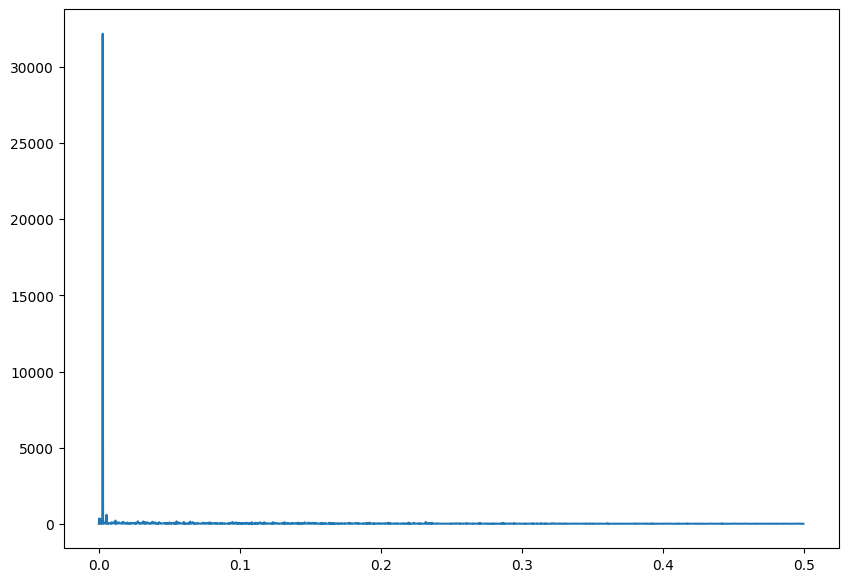

In [31]:
plt.figure(figsize = (10, 7))
plt.plot(f_3, Pxx_3)
plt.show()

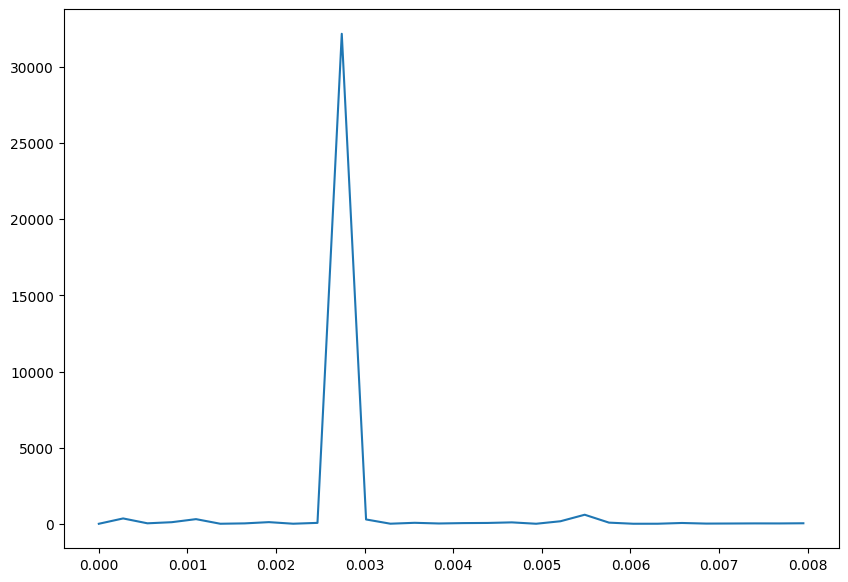

In [32]:
plt.figure(figsize = (10, 7))
plt.plot(f_3[0:30], Pxx_3[0:30])
plt.show()

In [33]:
f_3 = f_3[0:30]
Pxx_3 = Pxx_3[0:30]

In [34]:
T_3_N = 1/f_3[Pxx_3.argmax()]

In [35]:
T_3_N

364.70000000000005

In [36]:
T_3 = (df_3['Time'].iloc[1] - df_3['Time'].iloc[0])*T_3_N

In [37]:
T_3

0.999178082177241

### d. Sinusoidal

In [38]:
f_4, Pxx_4 = signal.periodogram(df_4['X_t'])

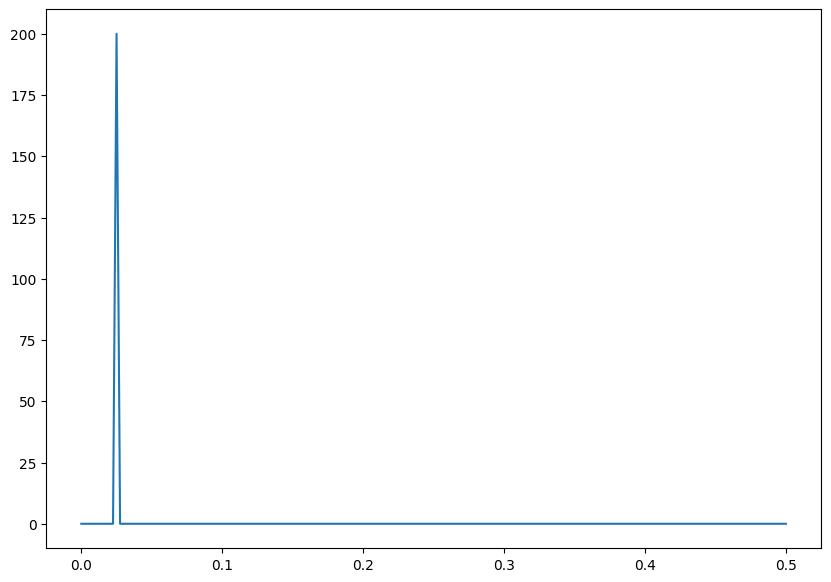

In [39]:
plt.figure(figsize = (10, 7))
plt.plot(f_4, Pxx_4)
plt.show()

In [40]:
T_4_N = 1/f_4[Pxx_4.argmax()]

In [41]:
T_4_N

40.0

In [42]:
T_4 = (df_4['Time'].iloc[1] - df_4['Time'].iloc[0])*T_4_N

In [43]:
T_4

4.0

### Time of execution

In [44]:
end = time.time()

In [45]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 1 seconds.
